len=123904
sec=2.809614512471655
6354


<IPython.core.display.Javascript object>


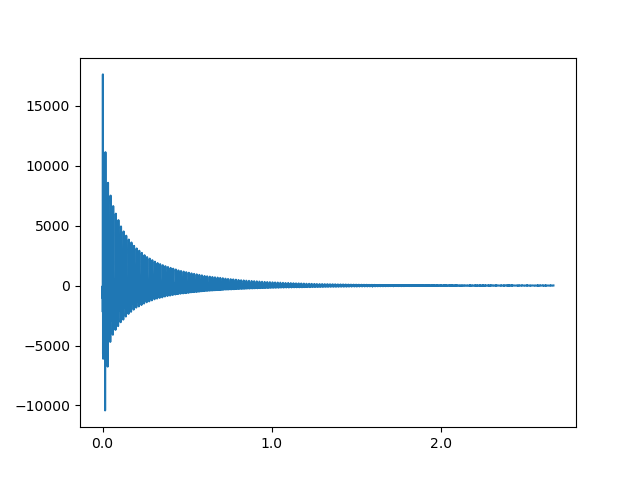

<IPython.core.display.Javascript object>


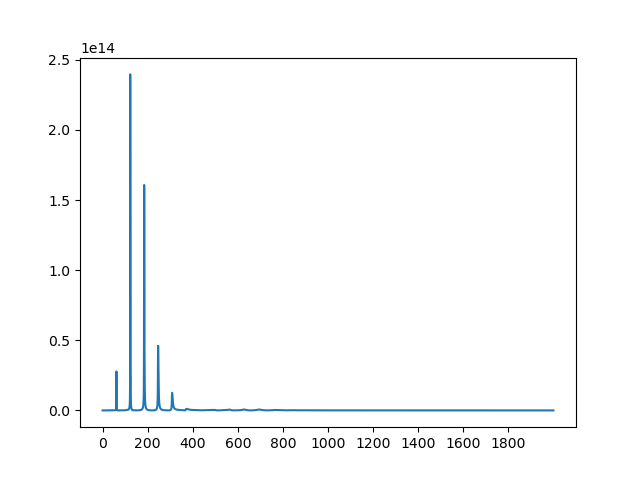

<IPython.core.display.Javascript object>


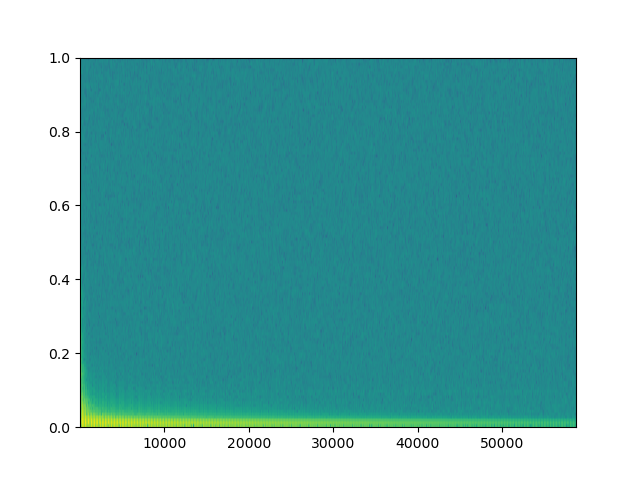

(0.0, 1.0)

In [142]:
#Basic signal processing by convolving a guitar note with a low-pass filter and plotting the result with a spectrogram

%matplotlib notebook

import numpy as np
from scipy.io.wavfile import read, write
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
from scipy import signal

audio=read("C_palm_note.wav") #16-bit PCM, returns array of int16, 65.40 Hz
frate=audio[0]
cutoff=2000
freq_interval=200

data=audio[1][:][:,1]
len=np.size(data)
len_s=len/frate
start=0
print("len="+str(len))
print("sec="+str(len_s))
#data[np.abs(data)<10]=0
for i in range(len):
    if abs(data[i])>1000:
        start=i
        print(start)
        break
data=data[start:]

fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(data)
plt.xticks(np.arange(0,len,step=frate),np.arange(0,len,step=frate)/frate);

fig2=plt.figure()
ax2=plt.subplot(1,1,1)
max_freq=int(cutoff*(len/frate))
ax2.plot(np.abs(np.fft.fft(data)**2)[0:max_freq])
plt.xticks(np.arange(0,max_freq,step=len_s*freq_interval),(np.arange(0,max_freq,step=len_s*freq_interval)/len_s).astype(int));

fig3=plt.figure()
ax3=plt.subplot(1,1,1)
#signal.spectrogram(data)

spec=ax3.specgram(data)
ax3.set_ylim(0,1)
#plt.yticks(
#f, t, Sxx = signal.spectrogram(data, frate)
#print(np.shape(Sxx))
#axes2.pcolormesh(t, f[0:10], Sxx[0:10], shading='gouraud');
#axes2.ylabel('Frequency [Hz]')
#axes2.xlabel('Time [sec]')
#axes2.show()